# Source

Data downloaded from here: https://data.gesis.org/tweetscov19/#dataset

Data should be stored in `./data`

Coulmn Names:
1. Tweet Id: Long. - NOT USED
2. Username: String. Encrypted for privacy issues. - NOT USED

3. Timestamp: Format ( "EEE MMM dd HH:mm:ss Z yyyy" ). ISOString => integer (e.g. 23517957).

4. #Followers: Integer.
5. #Friends: Integer.
6. #Retweets: Integer.
7. #Favorites: Integer.

8. Entities: String. For each entity, we aggregated the original text, the annotated entity and the produced score from FEL library. Each entity is separated from another entity by char ";". Also, each entity is separated by char ":" in order to store "original_text:annotated_entity:score;". If FEL did not find any entities, we have stored "null;".
9. Sentiment: String. SentiStrength produces a score for positive (1 to 5) and negative (-1 to -5) sentiment. We splitted these two numbers by whitespace char " ". Positive sentiment was stored first and then negative sentiment (i.e. "2 -1").

10. Mentions: String. If the tweet contains mentions, we remove the char "@" and concatenate the mentions with whitespace char " ". If no mentions appear, we have stored "null;".
11. Hashtags: String. If the tweet contains hashtags, we remove the char "#" and concatenate the hashtags with whitespace char " ". If no hashtags appear, we have stored "null;".

12. URLs: String: If the tweet contains URLs, we concatenate the URLs using ":-: ". If no URLs appear, we have stored "null;"

In [1]:
# imports
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
header = [
    "Tweet Id", 
    "Username", 
    "Timestamp", 
    "#Followers",
    "#Friends",
    "#Retweets",
    "#Favorites",
    "Entities",
    "Sentiment",
    "Mentions",
    "Hashtags",
    "URLs"
]

data = pd.read_csv("./data/TweetsCOV19_052020.tsv", names=header, sep='\t', quotechar='"')

In [3]:
data.head(10)

,Tweet Id,Username,Timestamp,#Followers,#Friends,#Retweets,#Favorites,Entities,Sentiment,Mentions,Hashtags,URLs
0,1255980348229529601,fa5fd446e778da0acba3504aeab23da5,Thu Apr 30 22:00:24 +0000 2020,29697,24040,0,0,null;,1 -1,null;,Opinion Next2blowafrica thoughts,null;
1,1255981220640546816,547501e9cc84b8148ae1b8bde04157a4,Thu Apr 30 22:03:52 +0000 2020,799,1278,4,6,null;,1 -1,null;,null;,null;
2,1255981244560683008,840ac60dab55f6b212dc02dcbe5dfbd6,Thu Apr 30 22:03:58 +0000 2020,586,378,1,2,null;,2 -1,null;,null;,https://www.bbc.com/news/uk-england-beds-bucks...
3,1255981472285986816,37c68a001198b5efd4a21e2b68a0c9bc,Thu Apr 30 22:04:52 +0000 2020,237,168,0,0,null;,1 -1,null;,null;,https://lockdownsceptics.org/2020/04/30/latest...
4,1255981581354905600,8c3620bdfb9d2a1acfdf2412c9b34e06,Thu Apr 30 22:05:18 +0000 2020,423,427,0,0,i hate u:I_Hate_U:-1.8786140035817729;quaranti...,1 -4,null;,null;,null;
5,1255982235662024704,491a98bbc105806cb67f46f5e3f3d888,Thu Apr 30 22:07:54 +0000 2020,52,46,0,0,god forbid:God_Forbid:-1.2640735877261988;covi...,2 -4,Danartman BishopStika,null;,https://www.dailymail.co.uk/health/article-826...
6,1255982852371554304,916dec763c84916c929bb257ff96187d,Thu Apr 30 22:10:21 +0000 2020,70185,10625,213,926,beijing:Beijing:-1.4222174822860647;covid 19:C...,1 -4,null;,null;,https://canoe.com/news/world/u-s-mulling-poten...
7,1255983890524786689,86e70e2bdc63363a4fecce1c9ba60e0f,Thu Apr 30 22:14:29 +0000 2020,507,379,5,6,null;,1 -4,null;,null;,https://www.dispatch.com/news/20200430/conditi...
8,1255985637246865410,d6fff22276aad81631affdecb83a8d9a,Thu Apr 30 22:21:25 +0000 2020,101,127,0,0,stealth:Stealth_game:-2.646174787470186;,1 -3,null;,null;,http://www.safetyhealthnews.com/covid-prompted...
9,1255985687062601729,2af96845573e5256307de4504c9051fc,Thu Apr 30 22:21:37 +0000 2020,414,2151,1,3,quarantine:Quarantine:-2.3096035868012508;,3 -2,AlanCane604,COVID19.,null;


In [4]:
len(data)

1912070

In [5]:
base_url = "https://api.twitter.com/2/tweets"
tweet_id = "1255985687062601729"

res = requests.get(f"{base_url}/{tweet_id}")
print(res) # error because need Auth: Bearer <token>, but this requires tweeter developer account

<Response [401]>


In [6]:
df_nz=data.loc[data['#Retweets'] != 0]
df_z=data.loc[data['#Retweets'] == 0]

In [7]:
df_nz['base10'] = np.log10(df_nz['#Retweets'])

<ipython-input-7-0a17ba2e8838>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nz['base10'] = np.log10(df_nz['#Retweets'])


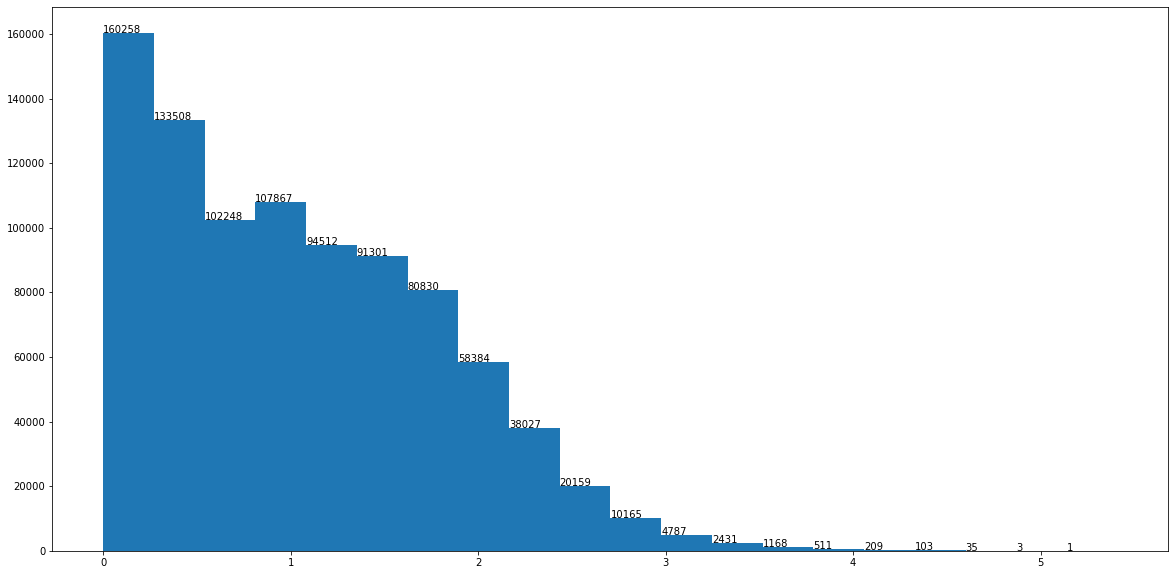

In [8]:
plt.rcParams["figure.figsize"] = (20,10)
xvals = np.arange(len(df_nz['#Retweets'].value_counts()))
yvals = list(df_nz['#Retweets'].value_counts())

counts, bins, _ = plt.hist(df_nz['base10'], bins=20)

for n, b in zip(counts, bins):
    if n > 0:
        plt.gca().text(b, n, str(int(n)))

plt.rcParams["figure.figsize"] = (20,10)
plt.show()

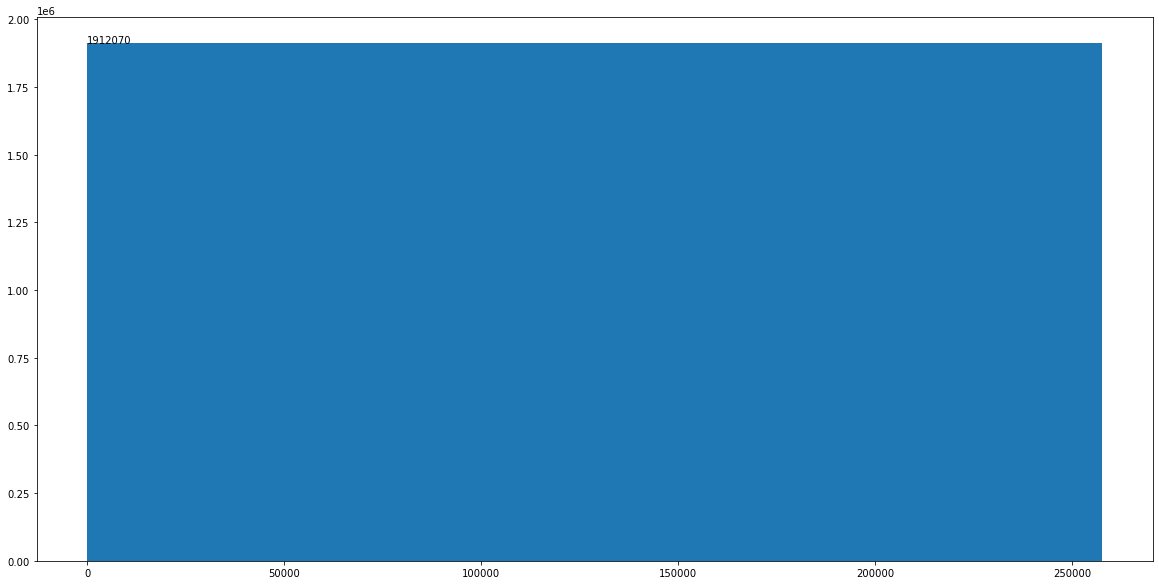

In [9]:
xvals = np.arange(len(data['#Retweets'].value_counts()))
yvals = list(data['#Retweets'].value_counts())

counts, bins, _ = plt.hist(data['#Retweets'], bins=1)

for n, b in zip(counts, bins):
    if n > 0:
        plt.gca().text(b, n, str(int(n)))


plt.show()

In [10]:
sorted_by_retweets = data.sort_values(by='#Retweets', ascending=False)
# sorted_by_retweets['#Entities'] = sorted_by_retweets.loc[sorted_by_retweets['Entities'] != "null"]
sorted_by_retweets.head(100)


,Tweet Id,Username,Timestamp,#Followers,#Friends,#Retweets,#Favorites,Entities,Sentiment,Mentions,Hashtags,URLs
1637862,1265465820995411973,0d4d9b3135ab4271ea36f4ebf8e9eae9,Wed May 27 02:12:17 +0000 2020,3317,3524,257467,845579,tear gas:Tear_gas:-1.688018296396458;,1 -1,null;,null;,null;
1208647,1266553959973445639,c9378a990def5939fb179e034a0d402e,Sat May 30 02:16:10 +0000 2020,18661,0,135818,363852,null;,1 -3,null;,null;,null;
1328169,1258750892448387074,1921c65230cd080c689dc82ea62e6e74,Fri May 08 13:29:33 +0000 2020,83320,1753,88667,224288,mike pence:Mike_Pence:-0.6712149436851893;ppe:...,1 -1,null;,null;,null;
1736035,1263579286201446400,7c4529bc4da01f288b95cd3876b4da47,Thu May 21 21:15:52 +0000 2020,451,359,82495,225014,null;,1 -1,null;,null;,null;
751238,1266546753182056453,32634ab407c86a56dde59551b3871c42,Sat May 30 01:47:31 +0000 2020,1545,874,66604,193599,douche:Douche:-2.0041883604919835;,3 -1,null;,null;,null;
...,...,...,...,...,...,...,...,...,...,...,...,...
407941,1264737293249794048,75224fc65ae453fe9ec3ca855cd8619b,Mon May 25 01:57:23 +0000 2020,80242531,46,25660,99272,null;,3 -1,null;,null;,null;
822506,1266335781775380480,bf4571b94429c5b18e0a219c197a56a4,Fri May 29 11:49:12 +0000 2020,6136949,28,25210,57242,covid 19:Coronavirus_disease_2019:-1.535776454...,1 -3,null;,null;,http://news.sky.com/story/coronavirus-monkeys-...
586930,1258537649368739840,f5636375bb151085d00b0d09e86e53b1,Thu May 07 23:22:12 +0000 2020,1571,639,24815,41715,null;,1 -1,gmpolice,null;,null;
492759,1263613225146482694,dcc2b63414b7da0eb620f046394b4116,Thu May 21 23:30:44 +0000 2020,724986,13034,24791,180780,twitter:Twitter:-1.1708686827892931;,1 -1,null;,null;,null;


Sad life. Apparently, most high retweets have no mentions and hashtags... T.T my work is useless honestly.

In [11]:
total_retweets = sorted_by_retweets['#Retweets'].sum()

In [12]:
df = data[['#Followers','#Friends','#Retweets','#Favorites']]
df = df.sort_values(by='#Retweets', ascending=True)
df

,#Followers,#Friends,#Retweets,#Favorites
0,29697,24040,0,0
1076952,808,859,0,0
1076950,2185,2978,0,0
1076949,345,648,0,0
1076948,164,551,0,0
...,...,...,...,...
751238,1545,874,66604,193599
1736035,451,359,82495,225014
1328169,83320,1753,88667,224288
1208647,18661,0,135818,363852


<AxesSubplot:>

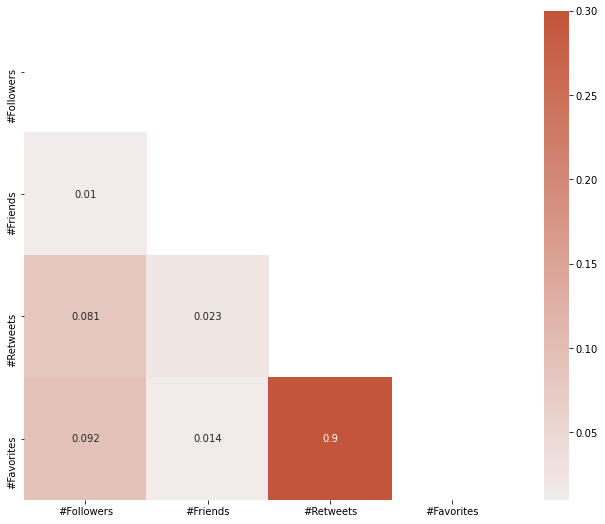

In [13]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df.corr(), annot=True, mask=mask, cmap=sns.diverging_palette(230, 20, as_cmap=True), vmax=.3, center=0, square=True)

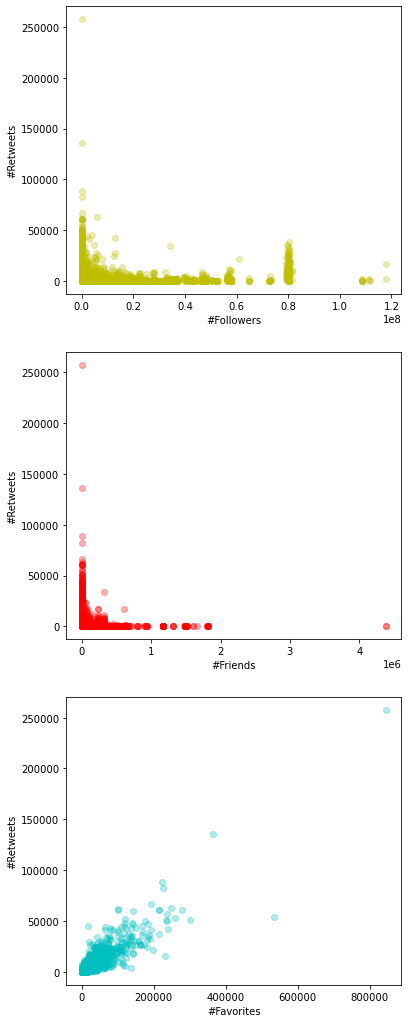

In [14]:
def plotter(data, target_col):
    column_list = list(data.columns)
    column_list.remove(target_col)
    len_col = len(column_list) #length of list of all the dependent variables
    fig, axes = plt.subplots(len_col, figsize = (6, 6 * len_col)) #Creating a plot with subplots for each independant variable
    for col, ax in zip(column_list, axes): #The for loop goes through zipped list of column names and subplot and plots each plot
        ax.scatter(data[col], data[target_col], alpha = 0.3, c = np.random.choice(['b', 'g', 'r', 'c', 'm', 'y', 'k']))
        ax.set_xlabel(col)
        ax.set_ylabel(target_col)
        

plotter(df, '#Retweets')

## Clustering / Label Generation

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='clusters', ylabel='WSS'>

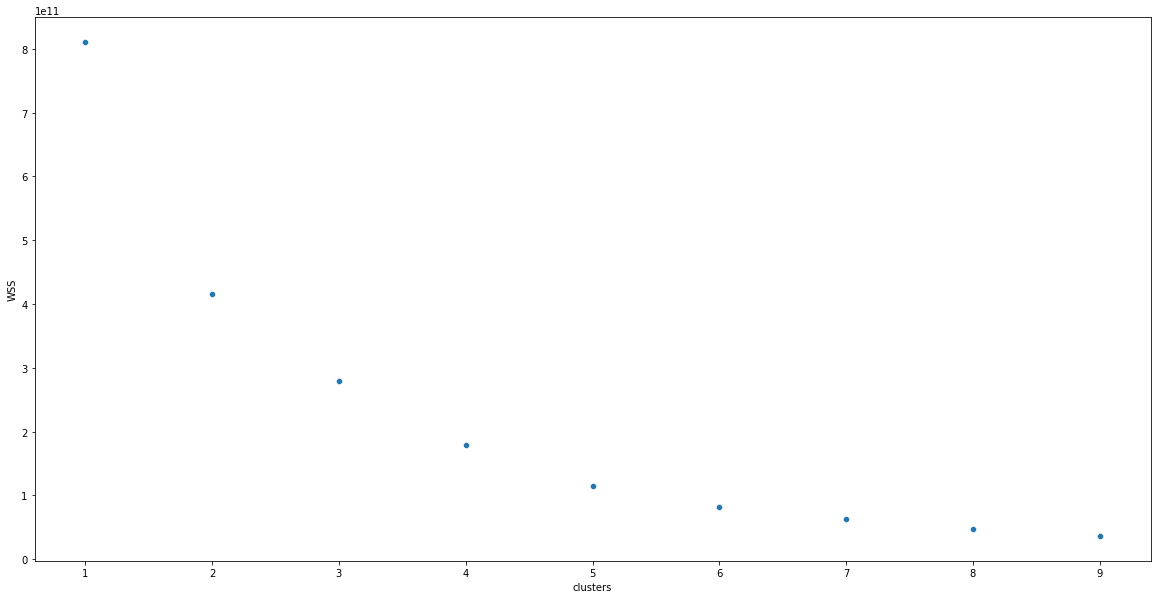

In [16]:
distances=[]
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df[["#Retweets","#Retweets"]])
    distances.append(km.inertia_)

sns.scatterplot(x='clusters', y='WSS', data=pd.DataFrame({'clusters': K,'WSS':distances}))

In [17]:
for d in distances:
    print(d/max(distances))

1.0
0.5127907391155928
0.34402738683368334
0.22180625142281146
0.14167138840865065
0.10080692537767068
0.07806793374507084
0.05836586118004846
0.044831397917746936


In [18]:
km = KMeans(n_clusters=3)
df['cluster'] = km.fit_predict(df[["#Retweets","#Retweets"]])
df.head()

,#Followers,#Friends,#Retweets,#Favorites,cluster
0,29697,24040,0,0,0
1076952,808,859,0,0,0
1076950,2185,2978,0,0,0
1076949,345,648,0,0,0
1076948,164,551,0,0,0


In [19]:
for x in range(3):
    print(len(df[df['cluster']==x]))

1910213
132
1725


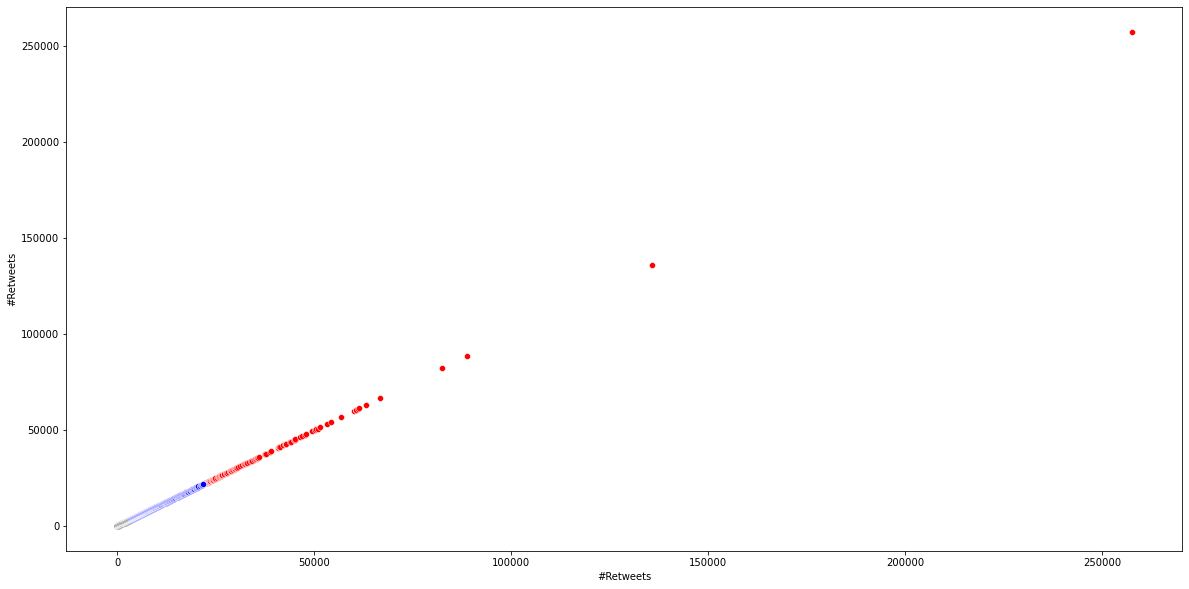

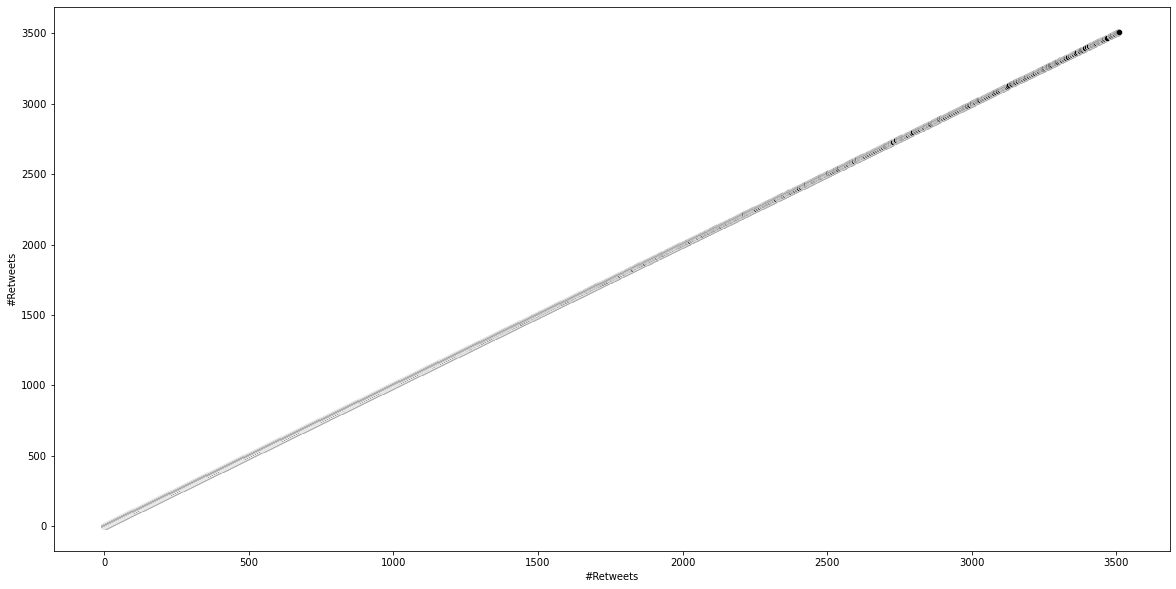

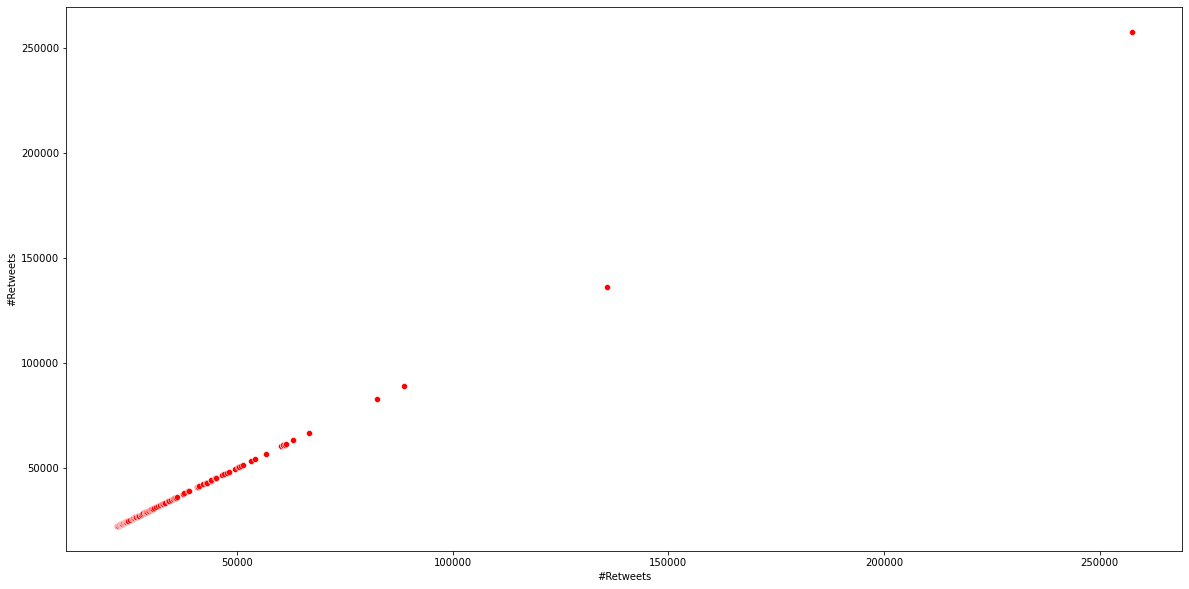

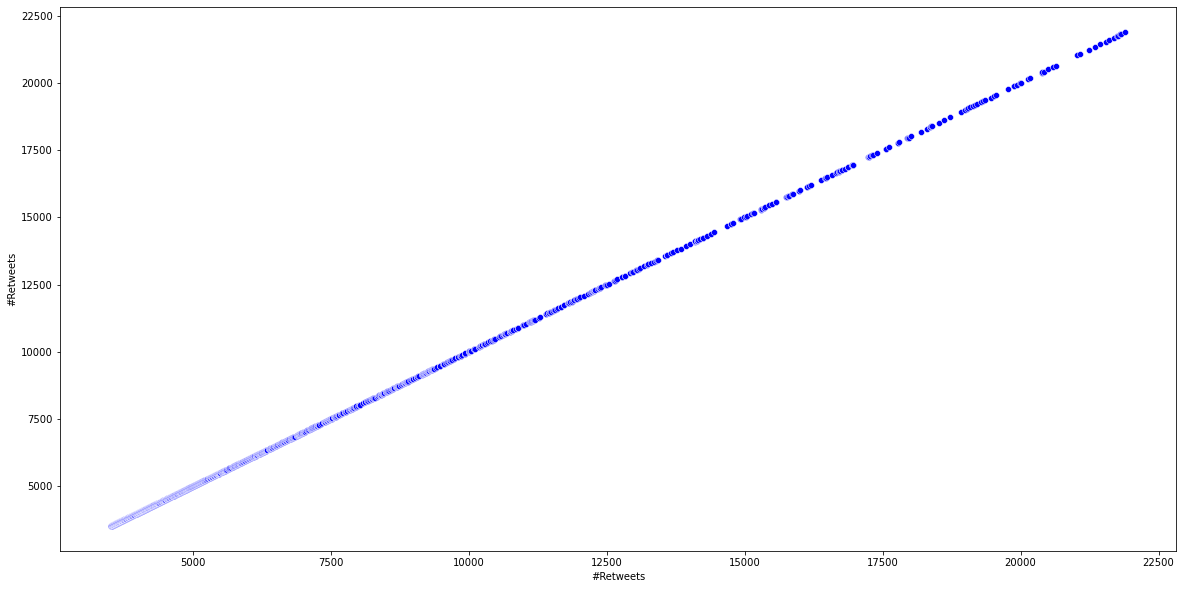

In [20]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

sns.scatterplot(x='#Retweets',y='#Retweets', data=df1, color='black')
sns.scatterplot(x='#Retweets',y='#Retweets', data=df2, color='red')
sns.scatterplot(x='#Retweets',y='#Retweets', data=df3, color='blue')
plt.show()
sns.scatterplot(x='#Retweets',y='#Retweets', data=df1, color='black')
plt.show()
sns.scatterplot(x='#Retweets',y='#Retweets', data=df2, color='red')
plt.show()
sns.scatterplot(x='#Retweets',y='#Retweets', data=df3, color='blue')
plt.show()

In [21]:
1/0

ZeroDivisionError: division by zero

In [22]:
for split in [0,0.8,0.96]:
    print(df.iloc[int(len(df)*split)-1])

#Followers      3317
#Friends        3524
#Retweets     257467
#Favorites    845579
cluster            1
Name: 1637862, dtype: int64
#Followers    23366
#Friends      14669
#Retweets        14
#Favorites        7
cluster           0
Name: 83748, dtype: int64
#Followers    978
#Friends      875
#Retweets     148
#Favorites    294
cluster         0
Name: 199915, dtype: int64


In [23]:
df['#LogRetweets']=df['#Retweets'].apply(lambda x: np.log10(x) if int(x) != 0 else 0)

In [24]:
df.tail()

,#Followers,#Friends,#Retweets,#Favorites,cluster,#LogRetweets
751238,1545,874,66604,193599,1,4.823500
1736035,451,359,82495,225014,1,4.916428
1328169,83320,1753,88667,224288,1,4.947762
1208647,18661,0,135818,363852,1,5.132957
1637862,3317,3524,257467,845579,1,5.410722


In [25]:
df['cluster']=df['#Retweets'].apply(lambda x: np.log10(x) if int(x) != 0 else 0)

In [26]:
splits=list(map(lambda x: int(x*len(df)),[0.8,0.96,1]))
for i in df.index:
    if i < splits[0]:
        df.at[i, 'cluster'] = 0
    elif i < splits[1]:
        df.at[i, 'cluster'] = 1
    else:
        df.at[i, 'cluster'] = 2

In [27]:
df['cluster'] = df['cluster'].astype(int)
n=[]
for x in range(3):
    n.append(len(df[df['cluster']==x]))
print(n)
print(sum(n))
print(len(df))
df.to_csv('sample.csv')

[1529656, 305931, 76483]
1912070
1912070


## Data Wrangling

In [35]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split
from tqdm import trange
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print (device)

class CreateDataset(Dataset):
    def __init__(self, path, limit=None):
        header = [
            "Tweet Id", 
            "Username", 
            "Timestamp", 
            "#Followers",
            "#Friends",
            "#Retweets",
            "#Favorites",
            "Entities",
            "Sentiment",
            "Mentions",
            "Hashtags",
            "URLs"
        ]
        
        data = pd.read_csv(path, names=header, sep='\t', quotechar='"').sample(n = limit)
        self.X = torch.from_numpy(data[['#Followers','#Friends','#Favorites']].values.astype(np.float32))
        self.y = torch.from_numpy(data[['#Retweets']].values.astype(np.float32))

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
class CreateDatasetAlt(Dataset):
    def __init__(self, dataframe, limit=None):  
        data = dataframe.sample(n = limit)
        self.X = torch.from_numpy(dataframe[['#Followers','#Friends','#Favorites']].values.astype(np.float32))
        self.y = dataframe['cluster']

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

cuda:0


In [29]:
dataset=CreateDatasetAlt(df, 100000)

In [30]:
print(len(dataset))
print(dataset[1])

1912070
(tensor([808., 859.,   0.]), 0)


In [31]:
train, test = torch.utils.data.random_split(dataset, [int(len(dataset)*0.8), int(len(dataset)*0.2)], generator=torch.Generator().manual_seed(0))

# create a data loader for train and test sets
train_dl = DataLoader(train, batch_size=128, shuffle=True)
test_dl = DataLoader(test, batch_size=1024, shuffle=False)

## LogReg Classification Model

In [32]:
class LogReg(nn.Module):
    def __init__(self, num_feature, num_class):
        super(LogReg, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

In [33]:
num_feature = 3
num_class = 3
learning_rate = 0.0007

model = LogReg(num_feature, num_class)

if torch.cuda.is_available():
    model.cuda()

In [36]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 50
for e in trange(num_epochs):
    batch_losses = []
    for i, (Xb, yb) in enumerate(train_dl):
        _X = Variable(Xb.cuda())
        _y = Variable(yb.type(torch.LongTensor).cuda())
        preds = model(_X)
        loss = criterion(preds, _y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        batch_losses.append(loss.item())

    mbl = np.mean(np.sqrt(batch_losses)).round(3)
    
    if e % 5 == 0:
        print("Epoch [{}/{}], Batch loss: {}".format(e, num_epochs, mbl))


  2%|█▌                                                                               | 1/50 [01:15<1:01:52, 75.76s/it]

Epoch [0/50], Batch loss: 0.735


 12%|█████████▉                                                                         | 6/50 [07:31<55:30, 75.69s/it]

Epoch [5/50], Batch loss: 0.689


 22%|██████████████████                                                                | 11/50 [13:27<46:09, 71.02s/it]

Epoch [10/50], Batch loss: 0.679


 32%|██████████████████████████▏                                                       | 16/50 [19:14<39:43, 70.11s/it]

Epoch [15/50], Batch loss: 0.677


 42%|██████████████████████████████████▍                                               | 21/50 [25:02<33:38, 69.61s/it]

Epoch [20/50], Batch loss: 0.68


 52%|██████████████████████████████████████████▋                                       | 26/50 [31:34<30:48, 77.02s/it]

Epoch [25/50], Batch loss: 0.664


 62%|██████████████████████████████████████████████████▊                               | 31/50 [37:42<23:46, 75.07s/it]

Epoch [30/50], Batch loss: 0.673


 72%|███████████████████████████████████████████████████████████                       | 36/50 [43:59<17:32, 75.18s/it]

Epoch [35/50], Batch loss: 0.649


 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [49:51<10:31, 70.19s/it]

Epoch [40/50], Batch loss: 0.656


 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [55:50<04:48, 72.24s/it]

Epoch [45/50], Batch loss: 0.654


100%|████████████████████████████████████████████████████████████████████████████████| 50/50 [1:00:36<00:00, 72.73s/it]


## LinReg Prediction Model


In [ ]:
# simplest linear model
class LinReg(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(LinReg, self).__init__()
        self.linear = torch.nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out
    
# taken from torch regression example
class LinReg2(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LinReg2, self).__init__()
        self.dense_h1 = nn.Linear(in_features=input_size, out_features=hidden_size)
        self.dense_out = nn.Linear(in_features=hidden_size, out_features=output_size)
        self.relu_h1 = nn.ReLU()

    def forward(self, X):

        out = self.relu_h1(self.dense_h1(X))
        out = self.dense_out(out)

        return out


In [ ]:
input_size = 3
hidden_size = 3
output_size = 1
learningRate = 0.01 

# model = LinReg(input_size, output_size)
model = LinReg2(input_size, hidden_size, output_size)

if torch.cuda.is_available():
    model.cuda()

In [ ]:
from tqdm.notebook import trange
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
# optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)

num_epochs = 50
for e in trange(num_epochs):
    batch_losses = []
    for i, (Xb, yb) in enumerate(train_dl):
        _X = Variable(Xb.cuda())
        _y = Variable(yb.cuda())
        preds = model(_X)
        loss = criterion(preds, _y)
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0) #clip gradients since not normalizing inputs
        optimizer.step()
        
        batch_losses.append(loss.item())

    mbl = np.mean(np.sqrt(batch_losses)).round(3)
    
    if e % 5 == 0:
        print("Epoch [{}/{}], Batch loss: {}".format(e, num_epochs, mbl))

In [ ]:
for _X, _y in test_dl:
    test_batch_losses = []
    _X = Variable(_X).cuda().float()
    _y = Variable(_y).cuda().float()

    #apply model
    test_preds = model(_X)
    test_loss = criterion(test_preds, _y)

    test_batch_losses.append(test_loss.item())
mbl = np.mean(np.sqrt(test_batch_losses)).round(3)

print("Test loss: {}".format(mbl))

In [ ]:
model.eval()
for _X, _y in test_dl:
    test_batch_losses = []
    _X = Variable(_X.cuda())
    _y = Variable(_y.cuda())

    #apply model
    test_preds = model(_X)
    test_loss = criterion(test_preds, _y)
    print(_X[0])
    print(test_preds)
    print(_y)
    break
    

In [ ]:
import xgboost as xgb

